In [109]:
import pandas as pd
import datetime
import re
import requests
import bs4
import matplotlib.pyplot as plt
#import matplotlib
from IPython.display import display, HTML

In [110]:
# Plot Covid data from WHO


In [111]:
df_who = pd.read_json (r'data-who/covidwho.json')

In [112]:
df_who.head()

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
0,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-22 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
1,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-23 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
2,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-24 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
3,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-25 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN
4,Afghanistan,AF,33.94,67.71,0,0,0,0,2020-01-26 00:00:00+00:00,828ca7f3-144f-4732-b659-a60f97755626,NaN,NaN,NaN


In [113]:
df_who_Germany = df_who[df_who['Country'] =="Germany"]
df_who_Germany

,Country,CountryCode,Lat,Lon,Confirmed,Deaths,Recovered,Active,Date,LocationID,Province,City,CityCode
9629,Germany,DE,51.17,10.45,0,0,0,0,2020-01-22 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9630,Germany,DE,51.17,10.45,0,0,0,0,2020-01-23 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9631,Germany,DE,51.17,10.45,0,0,0,0,2020-01-24 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9632,Germany,DE,51.17,10.45,0,0,0,0,2020-01-25 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9633,Germany,DE,51.17,10.45,0,0,0,0,2020-01-26 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9701,Germany,DE,51.17,10.45,91159,1275,24575,0,2020-04-03 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9702,Germany,DE,51.17,10.45,96092,1444,26400,0,2020-04-04 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9703,Germany,DE,51.17,10.45,100123,1584,28700,0,2020-04-05 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN
9704,Germany,DE,51.17,10.45,103374,1810,28700,0,2020-04-06 00:00:00+00:00,f770bd88-1a35-4430-bdbc-be3c62afc16b,NaN,NaN,NaN


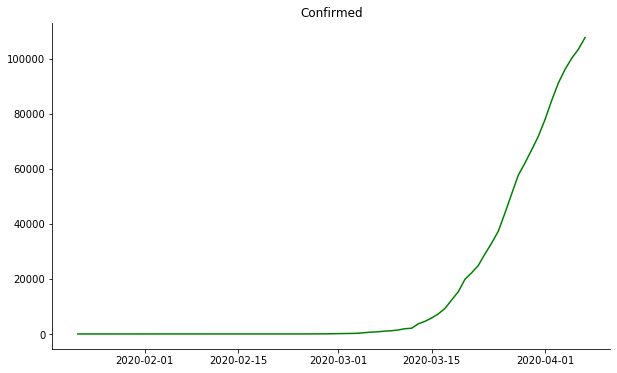

In [114]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df_who_Germany['Date'],
        df_who_Germany['Confirmed'],
        color="g");
ax.set_title("Confirmed");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

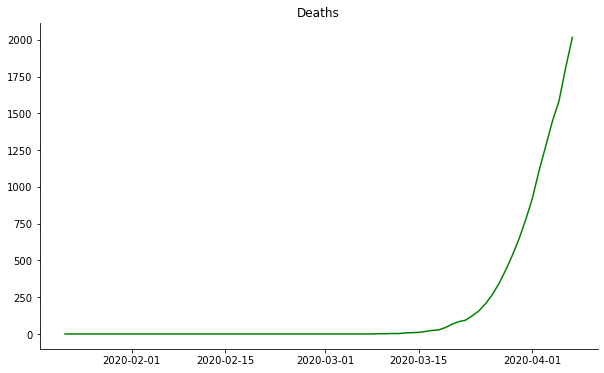

In [115]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df_who_Germany['Date'],
        df_who_Germany['Deaths'],
        color="g");
ax.set_title("Deaths");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

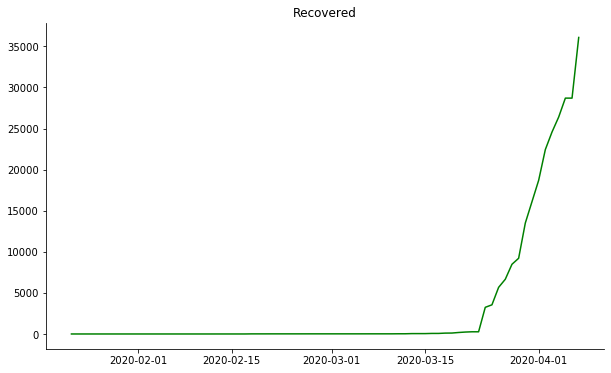

In [116]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(df_who_Germany['Date'],
        df_who_Germany['Recovered'],
        color="g");
ax.set_title("Recovered");
ax.spines["top"].set_visible(False);
ax.spines["right"].set_visible(False);

In [117]:
# Get data and plot it from EUROSTAT

In [179]:

countries_sel = ["Germany","Italy","Spain","Malta"]

Eurostat_title =  "Tourism"
json_RQST = 'tin00173?precision=1&unit=PC&accommod=BEDPL&shortLabel=1'

#Eurostat_title =  "Eurostat population density 2018"
#json_RQST = "tps00003?unit=PER_KM2&precision=1&time=2018"

#Eurostat_title =  "Eurostat air transport passengers 2018"
#json_RQST = "ttr00012?tra_meas=PAS_CRD&precision=1&tra_cov=TOTAL&schedule=TOT&unit=PAS&time=2018"

#Eurostat_title =  "Eurostat gdp/head 2018"
#json_RQST = "nama_10_pc?na_item=B1GQ&precision=1&unit=CLV10_EUR_HAB&time=2018"

#Eurostat_title =  "Eurostat health euro expenditure per capita and totals 2017"
#json_RQST = "tps00207?precision=1&unit=EUR_HAB&unit=MIO_EUR&unit=PC_GDP&icha11_hc=TOT_HC&time=2017"

#Eurostat_title = "Eurostat total nights spent by residents/non residents 2018"
#json_RQST = "tin00175?c_resid=FOR&c_resid=NAT&c_resid=TOTAL&precision=1&unit=NR&time=2018&nace_r2=I551-I553"

#Eurostat_title = "Eurostat total deaths by pnomonia 2016"
#json_RQST = "tps00128?precision=1&sex=F&sex=M&sex=T&unit=RT&time=2016&age=TOTAL&icd10=J12-J18"

#Eurostat_title = "Eurostat Standardised death rate due to chronic diseases by sex"
#json_RQST = "sdg_03_40?sex=F&sex=M&sex=T&precision=1&time=2016"

#Eurostat_title = "Eurostat Total Population in January1 st 2018"
#json_RQST = "proj_18np?precision=1&age=TOTAL"

#Eurostat_title = "Eurostat # of practising physicians per 100k inhabitants 2017"
#json_RQST = "tps00044?precision=1&isco08=OC221&unit=P_HTHAB&wstatus=PRACT&time=2017"

#Eurostat_title =  "Eurostat Share of people with good or very good perceived health by sex above 16 2019"
#json_RQST = "sdg_03_20?precision=1&sex=F&sex=M&sex=T&unit=PC&quantile=TOTAL&time=2019&age=Y_GE16&levels=VG_G"


base = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/"
url = base + json_RQST


In [180]:

def eurostat(url):
    from pyjstat import pyjstat
    from collections import OrderedDict
    # read from json-stat
    dataset = pyjstat.Dataset.read(url)
    # write to dataframe
    df = dataset.write('dataframe')
    return df
    #example from query builder    

df = eurostat(url)


#### Display dataset ##########
print ("Dataset for" , Eurostat_title)    
df

Dataset for Tourism


,accommod,unit,geo,time,value
0,Bedplaces,Percentage,Austria,2019M03,53.4
1,Bedplaces,Percentage,Austria,2019M04,34.8
2,Bedplaces,Percentage,Austria,2019M05,33.5
3,Bedplaces,Percentage,Austria,2019M06,48.3
4,Bedplaces,Percentage,Austria,2019M07,59.3
...,...,...,...,...,...
475,Bedplaces,Percentage,Kosovo (under United Nations Security Council ...,2019M10,15.8
476,Bedplaces,Percentage,Kosovo (under United Nations Security Council ...,2019M11,15.7
477,Bedplaces,Percentage,Kosovo (under United Nations Security Council ...,2019M12,15.5
478,Bedplaces,Percentage,Kosovo (under United Nations Security Council ...,2020M01,NaN


Dataset for Tourism
Countries with the highest values in blue:


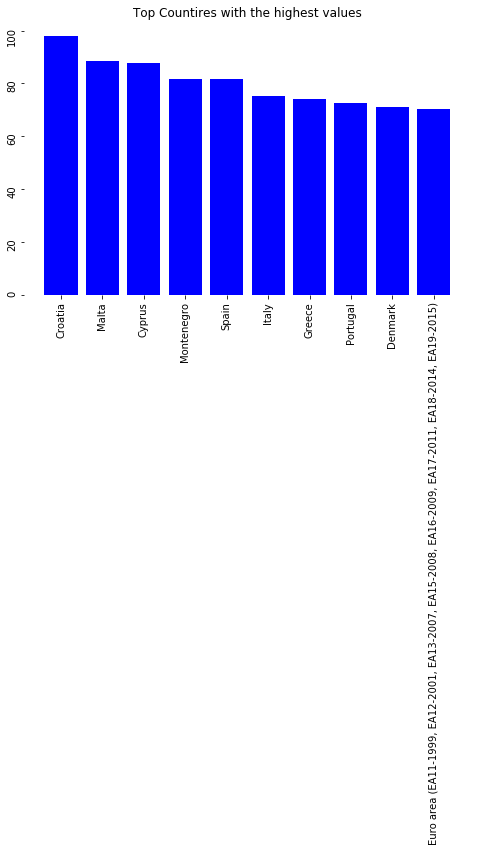

Dataset for month March, Tourism


,accommod,unit,geo,time,value
0,Bedplaces,Percentage,Austria,2019M03,53.40
12,Bedplaces,Percentage,Belgium,2019M03,43.37
24,Bedplaces,Percentage,Bulgaria,2019M03,27.30
36,Bedplaces,Percentage,Switzerland,2019M03,39.00
48,Bedplaces,Percentage,Cyprus,2019M03,48.90
60,Bedplaces,Percentage,Czechia,2019M03,46.50
72,Bedplaces,Percentage,Germany (until 1990 former territory of the FRG),2019M03,39.91
84,Bedplaces,Percentage,Denmark,2019M03,39.00
96,Bedplaces,Percentage,"Euro area (EA11-1999, EA12-2001, EA13-2007, EA...",2019M03,41.84
108,Bedplaces,Percentage,Estonia,2019M03,37.00


Dataset for Tourism
Countries with the highest values in month March are:


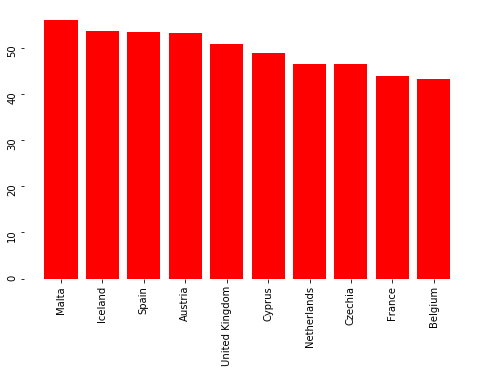

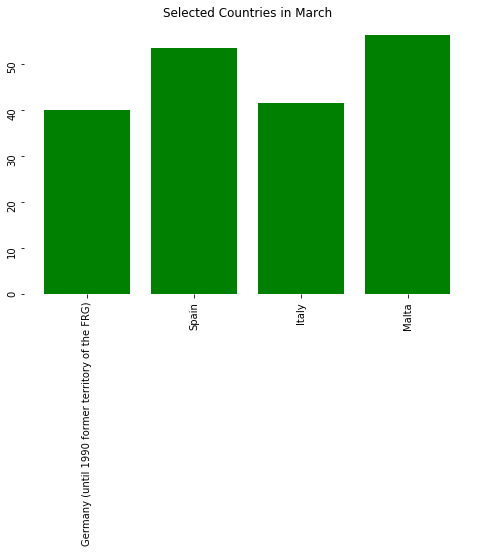

In [181]:

#all in one block



def Eurostat_Max_Unique (df):

    Eurostat_Max_noDuplicate = df.sort_values('value', ascending=False).drop_duplicates(['geo'])
    return Eurostat_Max_noDuplicate



def Eurostat_March (df):
    
    Eurostat_March = df[df['time']=="2019M03"]
    return Eurostat_March



def Eurostat_rating (df, countries_sel):
    
    Eurostat_rating_sel = df[df.geo.str.contains('|'.join(countries_sel))]
    return Eurostat_rating_sel
    


def Eurostat_rating_March (df, countries_sel):
    
    df_March = df[df['time']=="2019M03"]
    Eurostat_rating_sel_March = df_March[df_March.geo.str.contains('|'.join(countries_sel))]
    return Eurostat_rating_sel_March




#def top_n_cats (df, n):
#    top_n = (Eurostat_Max_Unique (df,n)
#            .sort_values("value", ascending=False)
#            .reset_index()
#            .head(n))
#    return top_n



#display(df)


top_10_cats = (Eurostat_Max_Unique (df)
               .sort_values("value", ascending=False)
               .reset_index()
               .head(10))



#### Plot countries with the highest values ##########



print ("Dataset for" , Eurostat_title)
print ("Countries with the highest values in blue:")


fig1, ax = plt.subplots(figsize=(8,5))

ax.bar(top_10_cats["geo"],
      top_10_cats["value"],
       color='b');
ax.tick_params(labelrotation=90);
ax.set_title("Top Countires with the highest values");
ax.set_frame_on(False);

plt.show()


#### Does Data for March exist? Then plot it otherwise  ##########



if ('2019M03' in df['time'].values):

    print ("Dataset for month March," , Eurostat_title)
    display(Eurostat_March (df))
    
    
    print ("Dataset for" , Eurostat_title)
    print ("Countries with the highest values in month March are:")
    
    


    top_10_cats_March = (Eurostat_March (df)
                   .sort_values("value", ascending=False)
                   .reset_index()
                   .head(10))

    fig, ax = plt.subplots(figsize=(8,5))

    ax.bar(top_10_cats_March["geo"],
          top_10_cats_March["value"],
           color='r');
    ax.tick_params(labelrotation=90);
    #ax.set_title("Top Countries with the highest Values in March");
    ax.set_frame_on(False);
    
    
    #plot the selected countries in March in green
    Eurostat_rating_March(df, countries_sel)

    fig, ax = plt.subplots(figsize=(8,5))

    ax.bar(Eurostat_rating_March(df, countries_sel)["geo"],
           Eurostat_rating_March(df, countries_sel)["value"],
           color='g');
    ax.tick_params(labelrotation=90);
    ax.set_title("Selected Countries in March");
    ax.set_frame_on(False);
    
    
else:

    
    #plot the selected countries in green 
    print ("Dataset for" , Eurostat_title)
    Eurostat_rating(df, countries_sel)

    fig, ax = plt.subplots(figsize=(8,5))

    ax.bar(Eurostat_rating(df, countries_sel)["geo"],
           Eurostat_rating(df, countries_sel)["value"],
           color='g');
    ax.tick_params(labelrotation=90);
    ax.set_title("Selected Countries");
    ax.set_frame_on(False);



